<a href="https://colab.research.google.com/github/yves-moringa/MoringaDSC14Wk6/blob/main/Moringa_Data_Science_Core_W6_Independent_Project_2022_04_Yves_Havugimana_Python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Moringa
# DSC 14
# IP WK 6
# Yves Havugimana

##1. Data Understanding

In [65]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [66]:
# Loading fifa ranking

fifa_ranking = pd.read_csv("fifa_ranking.csv")

fifa_ranking.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [67]:
# loading results

results = pd.read_csv("results.csv")

results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [68]:
# datatypes in fifa_ranking

fifa_ranking.dtypes

rank                         int64
country_full                object
country_abrv                object
total_points               float64
previous_points              int64
rank_change                  int64
cur_year_avg               float64
cur_year_avg_weighted      float64
last_year_avg              float64
last_year_avg_weighted     float64
two_year_ago_avg           float64
two_year_ago_weighted      float64
three_year_ago_avg         float64
three_year_ago_weighted    float64
confederation               object
rank_date                   object
dtype: object

In [69]:
# datatypes in results

results.dtypes

date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object

In [70]:
# Number of columns and rows in each dataset

print("fifa_ranking: ",fifa_ranking.shape)

print("results: ",results.shape)

fifa_ranking:  (57793, 16)
results:  (40839, 9)


##2. Data Preparation

In [71]:
# harmonizing column names

print("fifa_ranking column names: ", fifa_ranking.columns,"\n")

print("results column names: ", results.columns)

fifa_ranking column names:  Index(['rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'rank_date'],
      dtype='object') 

results column names:  Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral'],
      dtype='object')


In [72]:
# missing values in fifa_ranking

fifa_ranking.isnull().sum()

rank                       0
country_full               0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
rank_date                  0
dtype: int64

In [73]:
# missing values in results

results.isnull().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

In [74]:
# duplicate values in fifa_ranking

fifa_ranking.duplicated().sum()

37

In [75]:
# removing duplicates from fifa_ranking

fifa_ranking_no_duplicates  = fifa_ranking.drop_duplicates()

fifa_ranking_no_duplicates.duplicated().sum()

0

In [76]:
# duplicate values in reseults

results.duplicated().sum()

0

In [77]:
# descriptive stats on fifa_ranking

fifa_ranking_no_duplicates.describe()

,rank,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted
count,57756.000000,57756.000000,57756.000000,57756.000000,57756.000000,57756.000000,57756.000000,57756.000000,57756.000000,57756.000000,57756.000000,57756.000000
mean,101.618118,121.971151,332.339965,-0.009938,61.751362,61.751362,60.953507,30.476830,59.734768,17.920469,59.114466,11.822922
std,58.635096,260.479191,302.964176,5.802788,138.042006,138.042006,137.712945,68.856514,136.319119,40.895761,135.540135,27.108034
min,1.000000,0.000000,0.000000,-72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.000000,0.000000,56.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,101.000000,0.000000,272.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,152.000000,91.500000,525.000000,1.000000,30.447500,30.447500,26.400000,13.200000,21.250000,6.380000,20.795000,4.162500
max,209.000000,1775.030000,1920.000000,92.000000,1158.660000,1158.660000,1169.570000,584.790000,1159.710000,347.910000,1200.770000,240.150000


In [78]:
# descriptive stats on results

results.describe()

,home_score,away_score
count,40839.000000,40839.000000
mean,1.745709,1.188105
std,1.749145,1.405120
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


## 3.Data Analysis

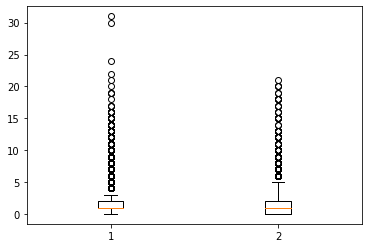

In [83]:
# boxplot on resuts

plt.boxplot([results.home_score, results.away_score])

plt.show()